In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler
from sklearn.model_selection import train_test_split

In [134]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train_len = len(train)

In [135]:
y = train['income']

In [136]:
data_all = pd.concat([train.iloc[:, :-1], test])

## marital-status

In [137]:
data_all['marital-status'][data_all['marital-status']!=' Married-civ-spouse'] = 0
data_all['marital-status'][data_all['marital-status']==' Married-civ-spouse'] = 1
data_all['marital-status'] = data_all['marital-status'].astype('int64')

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## relationship

In [138]:
data_all['relationship'][(data_all['relationship']!=' Husband') & (data_all['relationship']!=' Wife')] = 0
data_all['relationship'][(data_all['relationship']==' Husband') | (data_all['relationship']==' Wife')] = 1
data_all['relationship'] = data_all['relationship'].astype('int64')

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
data_all.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,1,25,Private,219199,11th,7,0,Machine-op-inspct,0,White,Male,0,0,40,United-States
1,2,39,Private,52978,Some-college,10,0,Other-service,0,White,Female,0,1721,55,United-States
2,3,35,Private,196899,Bachelors,13,0,Handlers-cleaners,0,Asian-Pac-Islander,Female,0,0,50,Haiti
3,4,64,Private,135527,Assoc-voc,11,0,Tech-support,0,White,Female,0,0,40,United-States
4,5,24,Private,60783,Some-college,10,1,Transport-moving,1,White,Male,0,0,70,United-States


## drop un-important column

In [140]:
del data_all['education']
del data_all['native-country']
del data_all['workclass']
del data_all['no']
del data_all['race']

## one-hot Encoding

In [141]:
one_hot_encoding = pd.get_dummies(data_all)
one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 19536
Data columns (total 25 columns):
age                              48842 non-null int64
fnlwgt                           48842 non-null int64
education-num                    48842 non-null int64
marital-status                   48842 non-null int64
relationship                     48842 non-null int64
capital-gain                     48842 non-null int64
capital-loss                     48842 non-null int64
hours-per-week                   48842 non-null int64
occupation_ ?                    48842 non-null uint8
occupation_ Adm-clerical         48842 non-null uint8
occupation_ Armed-Forces         48842 non-null uint8
occupation_ Craft-repair         48842 non-null uint8
occupation_ Exec-managerial      48842 non-null uint8
occupation_ Farming-fishing      48842 non-null uint8
occupation_ Handlers-cleaners    48842 non-null uint8
occupation_ Machine-op-inspct    48842 non-null uint8
occupation_ Other-service  

In [142]:
one_hot_encoding.columns

Index(['age', 'fnlwgt', 'education-num', 'marital-status', 'relationship',
       'capital-gain', 'capital-loss', 'hours-per-week', 'occupation_ ?',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'sex_ Female', 'sex_ Male'],
      dtype='object')

In [143]:
del one_hot_encoding['fnlwgt']
del one_hot_encoding['occupation_ ?']
del one_hot_encoding['occupation_ Adm-clerical']
del one_hot_encoding['occupation_ Armed-Forces']
del one_hot_encoding['occupation_ Craft-repair']
del one_hot_encoding['occupation_ Farming-fishing']
del one_hot_encoding['occupation_ Handlers-cleaners']
del one_hot_encoding['occupation_ Machine-op-inspct']
del one_hot_encoding['occupation_ Other-service']
del one_hot_encoding['occupation_ Priv-house-serv']
del one_hot_encoding['occupation_ Protective-serv']
del one_hot_encoding['occupation_ Sales']
del one_hot_encoding['occupation_ Tech-support']
del one_hot_encoding['occupation_ Transport-moving']

## Data preprocessing

In [144]:
X = one_hot_encoding[:train_len]
X_test = one_hot_encoding[train_len:]

In [145]:
sc = MinMaxScaler()
sc.fit(one_hot_encoding)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [146]:
X_train = sc.transform(X)
X_te = sc.transform(X_test)

## Train Model

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [16]:
import keras

Using TensorFlow backend.


### RandomForest

In [17]:
rfc = RandomForestClassifier(random_state=42)
param_grid_rf = { 
    'n_estimators': [500,700,1100,1300,1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [13,15,17,19,21],
    'criterion' :['gini', 'entropy']
}

In [18]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv= 5)
CV_rfc.fit(X_train, y)

KeyboardInterrupt: 

In [230]:
print(CV_rfc.best_params_)
model_rf = CV_rfc.best_estimator_

{'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 500}


In [231]:
model_rf.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [232]:
cross_val_score(model_rf, X_train, y)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.86180776, 0.86199836, 0.85554873])

### XGBoost

In [175]:
xgbc = xgb.XGBClassifier(random_state=42)

In [176]:
param_grid={'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50, 100, 200, 300],
                 'objective':['binary:logistic'],
                 'random_state':[2]}
cv=KFold(n_splits=6, random_state=1)
gcv=GridSearchCV(xgbc, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

gcv.fit(X_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=10, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(gcv.best_params_)
model_xgbc = gcv.best_estimator_

In [ ]:
model_xgbc.fit(X_train, y)

In [180]:
cross_val_score(xgbc, X_train, y)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.86672126, 0.86895987, 0.86373874])

## Deep Learning

In [147]:
from keras import models
from keras import layers
from keras import regularizers

In [164]:
X = one_hot_encoding[:train_len]
X_test = one_hot_encoding[train_len:]

In [165]:
sc = MinMaxScaler()
sc.fit(one_hot_encoding)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [166]:
X_train_D = sc.transform(X)
X_test_D = sc.transform(X_test)

In [173]:
X_td, X_val, y_td, y_val = train_test_split(X_train_D, y, test_size=0.3, random_state=1)

In [174]:
model = models.Sequential()
model.add(layers.Dense(64, kernel_initializer='normal', activation='relu', input_shape=(11,)))
model.add(layers.Dense(32, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [175]:
model.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [176]:
hist = model.fit(X_td, y_td, batch_size=1024, epochs=25, validation_data=(X_val, y_val))

Train on 20513 samples, validate on 8792 samples
Epoch 1/25
20513/20513 [==============================] - 1s 41us/step - loss: 0.6114 - acc: 0.7454 - val_loss: 0.5235 - val_acc: 0.7652
Epoch 2/25
20513/20513 [==============================] - 0s 5us/step - loss: 0.4789 - acc: 0.7613 - val_loss: 0.4383 - val_acc: 0.7735
Epoch 3/25
20513/20513 [==============================] - 0s 4us/step - loss: 0.4242 - acc: 0.8030 - val_loss: 0.4200 - val_acc: 0.8006
Epoch 4/25
20513/20513 [==============================] - 0s 4us/step - loss: 0.4050 - acc: 0.8148 - val_loss: 0.4031 - val_acc: 0.8112
Epoch 5/25
20513/20513 [==============================] - 0s 4us/step - loss: 0.3913 - acc: 0.8187 - val_loss: 0.4006 - val_acc: 0.8122
Epoch 6/25
20513/20513 [==============================] - 0s 4us/step - loss: 0.3818 - acc: 0.8208 - val_loss: 0.3892 - val_acc: 0.8177
Epoch 7/25
20513/20513 [==============================] - 0s 4us/step - loss: 0.3736 - acc: 0.8233 - val_loss: 0.3785 - val_acc: 0.817

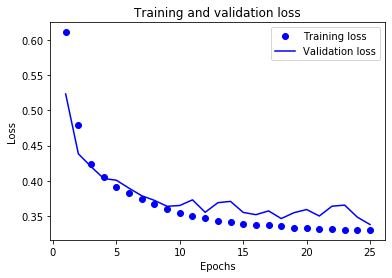

In [177]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

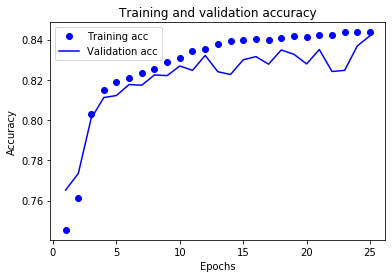

In [178]:
plt.clf()   # 그래프를 초기화합니다
acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [158]:
model = models.Sequential()
model.add(layers.Dense(64, kernel_initializer='normal', activation='relu', input_shape=(11,)))
model.add(layers.Dense(32, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])
model.fit(X_td, y_td, batch_size=512, epochs=4, validation_data=(X_val, y_val))

Train on 23444 samples, validate on 5861 samples
Epoch 1/4
23444/23444 [==============================] - 1s 36us/step - loss: 0.4846 - acc: 0.8058 - val_loss: 0.3553 - val_acc: 0.8377
Epoch 2/4
23444/23444 [==============================] - 0s 6us/step - loss: 0.3401 - acc: 0.8393 - val_loss: 0.3318 - val_acc: 0.8435
Epoch 3/4
23444/23444 [==============================] - 0s 6us/step - loss: 0.3283 - acc: 0.8447 - val_loss: 0.3252 - val_acc: 0.8470
Epoch 4/4
23444/23444 [==============================] - 0s 6us/step - loss: 0.3238 - acc: 0.8477 - val_loss: 0.3221 - val_acc: 0.8495


## save submission

In [159]:
y_pred = model.predict(X_te)
y_pred = (y_pred > 0.5)
y_pred = pd.DataFrame(y_pred, columns=['income'])
y_pred.iloc[:, 0].value_counts()

True     12804
False     6733
Name: income, dtype: int64

In [160]:
y_pred

,income
0,False
1,True
2,True
3,True
4,True
5,False
6,False
7,False
8,True
9,False


In [161]:
# if nessesary
#y_pred = pd.DataFrame(y_pred.iloc[:,0], columns=['income'])
y_pred['income'].replace(True, 1, inplace=True)
y_pred['income'].replace(False, 0, inplace=True)
y_pred = y_pred.astype('int64')

In [162]:
result = pd.concat([pd.DataFrame(list(range(29306, 48843)), columns=['no']), y_pred], axis=1)
result.to_csv('./submission.csv', index=False)